In [1]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('order_items.csv', 'order_items'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments')  # Added payments.csv for specific handling
]

# Connect to the MySQL database
# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Y1o2g3i4@',
    database='ecomerce'

)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/91844/Desktop/sql project/portfolio'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing order_items.csv
NaN values before replacement:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state            

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
import mysql.connector
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Y1o2g3i4@',
    database='ecomerce'

)
cur = conn.cursor()

# List all unique cities where customers are located.

In [9]:
query ="""select distinct customer_city from customers"""

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data , columns =["city"])
df

,city
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


# Count the number of orders placed in 2018.

In [19]:
query ="""select count(order_id) from orders where year(order_purchase_timestamp) =2018"""

cur.execute(query)

data=cur.fetchall()

"total orders placed in 2018 are  " , data[0][0]

('total orders placed in 2018 are  ', 540110)

# Find the total sales per category.

In [3]:
query ="""select upper(products.product_category) category , round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category"""

cur.execute(query)
data=cur.fetchall()
data

df=pd.DataFrame(data,columns=["category","sales"])
df

,category,sales
0,PERFUMERY,4.104583e+08
1,FURNITURE DECORATION,1.158443e+09
2,TELEPHONY,3.943745e+08
3,BED TABLE BATH,1.387168e+09
4,AUTOMOTIVE,6.903584e+08
...,...,...
69,CDS MUSIC DVDS,9.715383e+05
70,LA CUISINE,2.359959e+06
71,FASHION CHILDREN'S CLOTHING,6.363927e+05
72,PC GAMER,1.761288e+06


# Calculate the percentage of orders that were paid in installments.

In [14]:
query ="""select sum(case when payment_installments >=1 then 1 else 0 end)/count(*)*100 from payments"""

cur.execute(query)

data=cur.fetchall()

"the percentage of orders that were paid in installments " , data[0][0]

('the percentage of orders that were paid in installments ',
 Decimal('99.9981'))

# Count the number of customers from each state. 

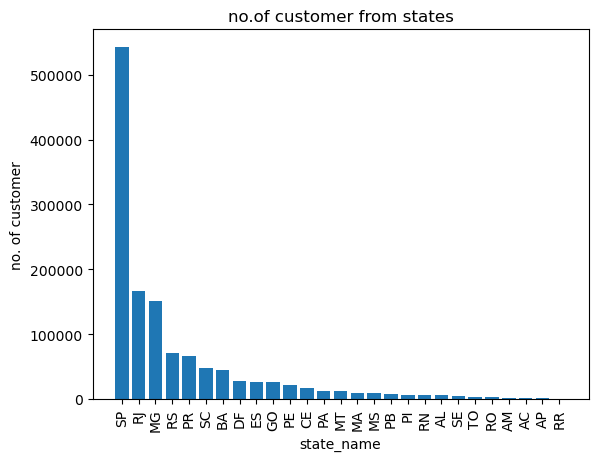

In [61]:
query ="""select customer_state ,count(customer_id) 
from customers group by customer_state"""

cur.execute(query)

data=cur.fetchall()

data

df= pd.DataFrame(data , columns=["state_name","no._of_customer"])
df=df.sort_values(by ="no._of_customer" ,ascending=False)

plt.bar(df["state_name"],df["no._of_customer"])
plt.xticks(rotation =90)
#plt.figure(figsize=(8,3))
plt.ylabel("no. of customer")
plt.xlabel("state_name")
plt.title("no.of customer from states")
plt.show()

# Calculate the number of orders per month in 2018.

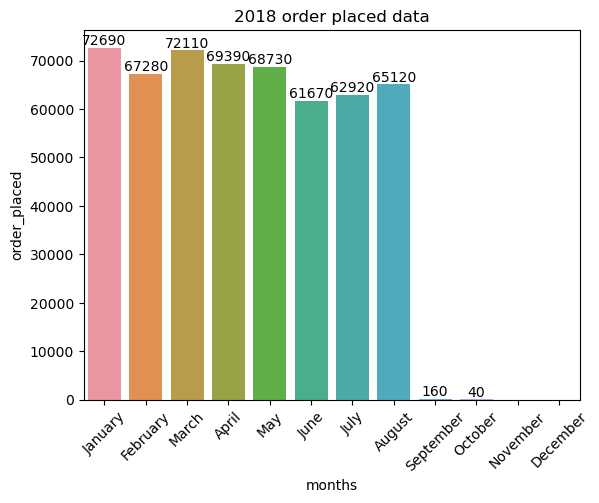

In [17]:
query ="""select monthname(order_purchase_timestamp) months ,count(order_id) order_count
from orders 
where year(order_purchase_timestamp)=2018 
group by months

"""

cur.execute(query)
data=cur.fetchall()
data


df =pd.DataFrame(data , columns = ["months","order_placed"])
df

import seaborn as sns

o = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
ax = sns.barplot(x=df["months"],y=df["order_placed"],order=o)

plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.title('2018 order placed data')
plt.show()

# Find the average number of products per order, grouped by customer city.


In [11]:
query ="""
with count_per_order as(
    select orders.order_id , orders.customer_id , count(order_items.order_id) as oc
    from orders join order_items
    on orders.order_id =order_items.order_id
    group by orders.order_id , orders.customer_id
)
    select customers.customer_city,round(avg(count_per_order.oc),2)
    from customers join count_per_order
    on customers.customer_id = count_per_order.customer_id
    group by customers.customer_city;

"""

cur.execute(query)
data=cur.fetchall()


df=pd.DataFrame(data,columns=["customer_city","average_products_per_order"])
df.head(20)

,customer_city,average_products_per_order
0,sao paulo,115.62
1,sao jose dos campos,113.85
2,porto alegre,117.49
3,indaial,111.54
4,treze tilias,127.27
5,rio de janeiro,114.68
6,mario campos,133.33
7,guariba,100.00
8,cuiaba,119.76
9,franca,125.16


#  Calculate the percentage of total revenue contributed by each product category.

In [5]:
import mysql.connector
import pandas as pd
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Y1o2g3i4@',
    database='ecomerce'

)
cur = conn.cursor();
query ="""select upper(products.product_category) category ,
round((sum(payments.payment_value)/(select sum(payment_value)from payments))*100,2) sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category 
order by sales_percentage"""

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["category ","percentage_distribution"])
df.head()



,category,percentage_distribution
0,INSURANCE AND SERVICES,0.18
1,FASHION CHILDREN'S CLOTHING,0.44
2,CDS MUSIC DVDS,0.67
3,HOUSE COMFORT 2,0.96
4,PC GAMER,1.22


#  Identify the correlation between product price and the number of times a product has been purchased.

In [9]:
query ="""
select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category;
"""

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["category ","order_count","price"])
df.head()

arr1 =df["order_count"]
arr2=df["price"]

a=np.corrcoef([arr1,arr2])
print("the correlation between price and number of times a product has been purchase is = ",a[0][1])

the correlation between price and number of times a product has been purchase -0.1063151416715756


# Calculate the total revenue generated by each seller, and rank them by revenue.

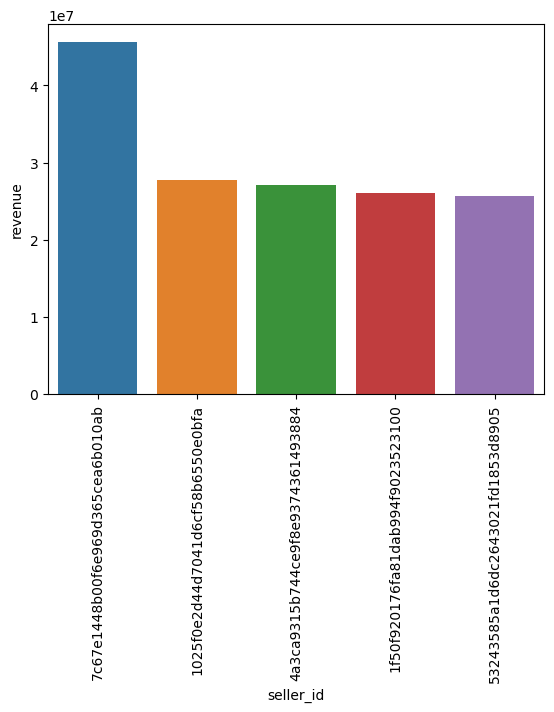

In [17]:
query ="""
select * , dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id , round(sum(payments.payment_value),2) revenue
from order_items join payments 
on order_items.order_id = payments.order_id
group by order_items.seller_id ) as a;

"""

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data ,columns=["seller_id","revenue","rank"])
df=df.head(5)
df
sns.barplot(x="seller_id" , y="revenue", data=df)
plt.xticks(rotation=90)
plt.show()



# Calculate the moving average of order values for each customer over their order history.

In [18]:
query ="""
select customer_id , order_purchase_timestamp , payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id , orders.order_purchase_timestamp,
payments.payment_value as payment
from payments join orders
on payments.order_id=orders.order_id ) as a;

"""

cur.execute(query)
data=cur.fetchall()

df= pd.DataFrame(data , columns=["customer_id","order_purchase_timestamp","payment","mov_avg_value"])
df.head(10)

,customer_id,order_purchase_timestamp,payment,mov_avg_value
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
5,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
6,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
7,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
8,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
9,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998


# Calculate the cumulative sales per month for each year.

In [18]:
query ="""
select years ,months,payment ,sum(payment)
over (order by years , months) cumulative_sales from
(select year(orders.order_purchase_timestamp) as years, 
month(orders.order_purchase_timestamp) as months, 
round(sum(payments.payment_value),2)as payment from orders join payments
on orders.order_id = payments.order_id 
group by years ,months order by years , months) as a;

"""

cur.execute(query)
data=cur.fetchall()

df= pd.DataFrame(data , columns=["years","months","payment","cumulative sales per month for each year"])
df.head(10)

,years,months,payment,cumulative sales per month for each year
0,2016,9,22701.60,2.270160e+04
1,2016,10,5318143.20,5.340845e+06
2,2016,12,1765.80,5.342611e+06
3,2017,1,12463923.61,1.780653e+07
4,2017,2,26271720.86,4.407826e+07
5,2017,3,40487723.96,8.456598e+07
6,2017,4,37600922.65,1.221669e+08
7,2017,5,53362693.81,1.755296e+08
8,2017,6,46014874.23,2.215445e+08
9,2017,7,53314462.75,2.748589e+08


# Calculate the year-over-year growth rate of total sales.

In [24]:
query ="""
with a as
(select year(orders.order_purchase_timestamp) as years,  
round(sum(payments.payment_value),2)as payment from orders join payments
on orders.order_id = payments.order_id 
group by years order by years ) 
select years , ((payment-lag(payment,1) over (order by years))/lag(payment,1) over (order by years))*100 from a
;

"""

cur.execute(query)
data=cur.fetchall()

df= pd.DataFrame(data , columns=["years","yoy% growth"])
df.head(10)

,years,yoy% growth
0,2016,NaN
1,2017,12112.703758
2,2018,20.000924


#  Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [42]:
query ="""
with a as( 
select customers.customer_id , 
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id ),

b as (select a.customer_id ,count(distinct orders.order_purchase_timestamp) 
from a join orders 
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < date_add(first_order , interval 6 month)
group by a.customer_id)

select 100*(count(distinct a.customer_id)/count(distinct b.customer_id))
from a left join b 
on a.customer_id = b.customer_id ;



"""

cur.execute(query)
data=cur.fetchall()
data


[(None,)]

#### there is no customer which purchase another product in 6 months.

# Identify the top 3 customers who spent the most money in each year.

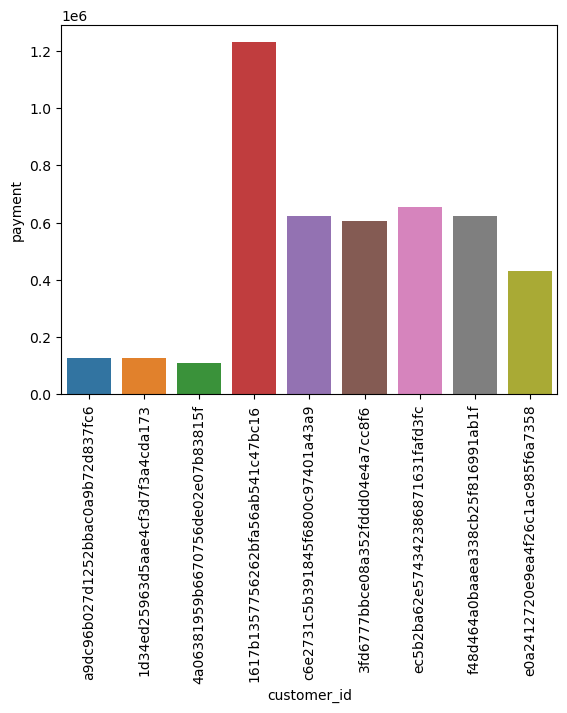

In [30]:
query = """
select year ,customer_id ,payment , d_rank from
(select year(orders.order_purchase_timestamp) year,
orders.customer_id,
sum(payments.payment_value) payment ,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id ) as a
where d_rank <= 3;  
"""
cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data ,columns=["year","customer_id","payment","Rank"])

sns.barplot(x="customer_id" ,y="payment",data =df)
plt.xticks(rotation =90)
plt.show()